In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import os

In [149]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [150]:
os.chdir('C:\\Users\\gbulgach\\Desktop\\Curso Data Science\\desafio_final')

# Desafio final Digital House

##### El desafío consiste en utilizar un dataset de Recursos Humanos de una compañía de telecomunicaciones con el objetivo de predecir la baja de un colaborador.
##### El dataset cuenta con los empleados activos de la empresa y las bajas voluntarias e involuntarias de los años 2018, 2019 y 2020.


<a id="section_indice"></a> 
## Indice

[1- Limpieza del dataset](#section_limpieza)

[2- Análisis exploratorio del dataset](#section_EDA)



### Limpieza del dataset

<a id="section_limpieza"></a> 
[volver a Indice](#section_indice)

In [151]:
df = pd.read_csv('dataset_bajas.csv', encoding = 'latin1', sep = ';', low_memory = False)

In [152]:
df.head(4)

,REGION_GESTIONAL,BAJA_NUM,AREA_DE_NEGOCIO,AREA_GESTIONAL,AREA DE NEGOCIO 2,Id_Soc,Posición,Categ,Repr_Gremial,REPRE_GREMIAL II,Clase_de_Contrato,Mes,Año,Fecha_Antig,Antig_Recon,Fecha_Nacim,edad,sexo,Unidad_Organizativa,ENCUADRE,GENERACIÓN,GENERACION_O,GRUPO JERARQUICO,GRUPO JERARQUICO_O,nacionalidad,estado_civil,puesto_sindical,htrab,Gr.prof,gerencia_operativa,PAIS_SOC,DIRECCION,EMPLEADO CON HIJOS Q,COMPA RATIO BAJAS,COMPA RATIO,COMPA RATIO ABD,TIPO BAJA,PERFIL DIGITAL,Función,Categoría del puesto,Agrupador Categorá del puesto,Grupo de personal,Horas laborables semanales,Superior directo_legajo,Superior directo_q reportes,Home_Partido,Home_Provincia,Home_Pais,Laboral_Localidad,Laboral_Provincia,Laboral_Pais,Tipo de estructura,COLABORADORES,LIDERES,nivel_estudios_alcanzado,mensajes_yammer,hijos_menos_cinco,hijos_entre_seis_diez,hijos_entre_once_quince,hijos_entre_dieciseis_veinte,hijos_mas_veinte
0,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Atención Presencial Atención Comercial,PC,Dentro de convenio,FATEL,Regular,6,2020,"2001-02-16 00:00:00,000",19.0,"1974-12-05 00:00:00,000",45.0,Femenino,ROSARIO ROCA 2,DENTRO DE CONVENIO,Generación X,2,COLABORADOR,1,argentina,divorciado/a,NaN,84,SITR. M,Region Litoral,ARGENTINA,COO,1.0,NaN,NaN,NaN,NaN,NaN,Atención Presencial,Atención Comercial,Ventas y Atención al Cliente,CONTRIBUIDOR INDIVIDUAL,20.0,527639.0,11,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fé,Argentina,Area de Negocio,1,0,3.0,3,1,0,0,0,0
1,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Supervisor/a ROSARIO ROCA 3,F5,Dentro de convenio,FOPSSTA,Regular,6,2020,"2003-11-01 00:00:00,000",16.0,"1978-07-17 00:00:00,000",41.0,Femenino,ROSARIO ROCA 3,DENTRO DE CONVENIO,Generación X,2,GESTIÓN,2,argentina,casado/a,NaN,160,FOPST. M,Region Litoral,ARGENTINA,COO,2.0,NaN,NaN,NaN,NaN,NaN,Supervisor/a,Estructura Operativa,Estructura Operativa,LIDER DE EQUIPO,40.0,201122.0,6,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fé,Argentina,Area de Negocio,0,1,3.0,1,0,2,0,0,2
2,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Atención Presencial de Ventas,NC,Dentro de convenio,FATEL,Regular,6,2020,"2001-08-01 00:00:00,000",18.0,"1973-02-15 00:00:00,000",47.0,Femenino,ROSARIO ROCA 3,DENTRO DE CONVENIO,Generación X,2,COLABORADOR,1,argentina,soltero/a,NaN,84,SITR. M,Region Litoral,ARGENTINA,COO,2.0,NaN,NaN,NaN,NaN,NaN,Atención Presencial,Ventas,Ventas y Atención al Cliente,CONTRIBUIDOR INDIVIDUAL,20.0,193030.0,10,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fe,Argentina,Area de Negocio,1,0,2.0,0,0,1,1,0,1
3,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Atención Presencial de Soporte Comercial Oc,PC,Dentro de convenio,FATEL,Regular,6,2020,"2000-09-13 00:00:00,000",19.0,"1975-01-31 00:00:00,000",45.0,Femenino,SUPERVISION 1,DENTRO DE CONVENIO,Generación X,2,COLABORADOR,1,argentina,casado/a,NaN,160,SITR. M,Region Litoral,ARGENTINA,COO,1.0,NaN,NaN,NaN,NaN,NaN,Atención Presencial,Soporte Comercial Oc,Convenios,CONTRIBUIDOR INDIVIDUAL,40.0,193030.0,10,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fé,Argentina,Area Corporativa,1,0,1.0,0,0,0,1,0,0


# AÑO

##### Solo nos quedamos con el año 2020

In [153]:
df_año_mask = df.Año == 2020
df = df[df_año_mask]

# REGION_GESTIONAL

##### Modificamos los casos de NORTE y les ponemos la region que corresponde segun la provincia laboral

In [154]:
df.REGION_GESTIONAL.value_counts()

AMBA               13693
LITO                4546
MEDI                2897
NOA                 1131
PBA y PATAGONIA      932
NORTE                 67
Name: REGION_GESTIONAL, dtype: int64

In [155]:
df_n_m = df.REGION_GESTIONAL == 'NORTE'
df_n = df[df_n_m]

In [156]:
df_n.BAJA_NUM.value_counts()

1    66
0     1
Name: BAJA_NUM, dtype: int64

In [157]:
df_n.Laboral_Provincia.value_counts()

Córdoba     56
La Pampa     4
Salta        3
Tucumán      2
La Rioja     1
Mendoza      1
Name: Laboral_Provincia, dtype: int64

In [158]:

df.loc[(df['Laboral_Provincia'] == 'Córdoba') | (df['Laboral_Provincia'] == 'La Pampa') | (df['Laboral_Provincia'] == 'Mendoza'), 'REGION_GESTIONAL'] = 'MEDI'
df.loc[(df['Laboral_Provincia'] == 'Tucumán') | (df['Laboral_Provincia'] == 'Salta') | (df['Laboral_Provincia'] == 'La Rioja'), 'REGION_GESTIONAL'] = 'NOA'

In [159]:
df.REGION_GESTIONAL.value_counts()

AMBA               13693
LITO                4546
MEDI                2958
NOA                 1137
PBA y PATAGONIA      932
Name: REGION_GESTIONAL, dtype: int64

# HTRAB

##### Modificamos los casos outliers que tenian mal la coma

In [160]:
df.htrab = pd.to_numeric(df.htrab, errors='coerce')

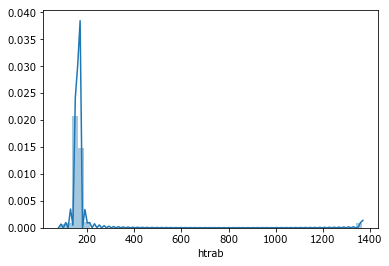

In [161]:
sns.distplot(df.htrab)

In [162]:
df.htrab.value_counts()

168     7975
160     6248
150     5106
140     1066
170      754
200      592
126      520
1365     483
84       458
176       59
132        4
120        1
Name: htrab, dtype: int64

In [163]:
df.htrab.replace(1365, 136.5, inplace = True)

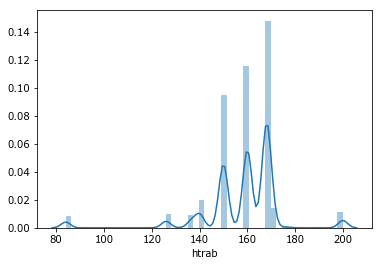

In [164]:
sns.distplot(df.htrab)

# AREA_GESTIONAL

##### En las regiones inextistentes ponemos la region que corresponde

In [166]:
df["AREA_GESTIONAL"]= df.apply(lambda x: x['AREA_GESTIONAL'].replace('NORTE', str(x['REGION_GESTIONAL'])), axis=1)
df["AREA_GESTIONAL"]= df.apply(lambda x: x['AREA_GESTIONAL'].replace('SUR', str(x['REGION_GESTIONAL'])), axis=1)

In [168]:
df.head(3)

,REGION_GESTIONAL,BAJA_NUM,AREA_DE_NEGOCIO,AREA_GESTIONAL,AREA DE NEGOCIO 2,Id_Soc,Posición,Categ,Repr_Gremial,REPRE_GREMIAL II,Clase_de_Contrato,Mes,Año,Fecha_Antig,Antig_Recon,Fecha_Nacim,edad,sexo,Unidad_Organizativa,ENCUADRE,GENERACIÓN,GENERACION_O,GRUPO JERARQUICO,GRUPO JERARQUICO_O,nacionalidad,estado_civil,puesto_sindical,htrab,Gr.prof,gerencia_operativa,PAIS_SOC,DIRECCION,EMPLEADO CON HIJOS Q,COMPA RATIO BAJAS,COMPA RATIO,COMPA RATIO ABD,TIPO BAJA,PERFIL DIGITAL,Función,Categoría del puesto,Agrupador Categorá del puesto,Grupo de personal,Horas laborables semanales,Superior directo_legajo,Superior directo_q reportes,Home_Partido,Home_Provincia,Home_Pais,Laboral_Localidad,Laboral_Provincia,Laboral_Pais,Tipo de estructura,COLABORADORES,LIDERES,nivel_estudios_alcanzado,mensajes_yammer,hijos_menos_cinco,hijos_entre_seis_diez,hijos_entre_once_quince,hijos_entre_dieciseis_veinte,hijos_mas_veinte
0,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Atención Presencial Atención Comercial,PC,Dentro de convenio,FATEL,Regular,6,2020,"2001-02-16 00:00:00,000",19.0,"1974-12-05 00:00:00,000",45.0,Femenino,ROSARIO ROCA 2,DENTRO DE CONVENIO,Generación X,2,COLABORADOR,1,argentina,divorciado/a,NaN,84.0,SITR. M,Region Litoral,ARGENTINA,COO,1.0,NaN,NaN,NaN,NaN,NaN,Atención Presencial,Atención Comercial,Ventas y Atención al Cliente,CONTRIBUIDOR INDIVIDUAL,20.0,527639.0,11,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fé,Argentina,Area de Negocio,1,0,3.0,3,1,0,0,0,0
1,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Supervisor/a ROSARIO ROCA 3,F5,Dentro de convenio,FOPSSTA,Regular,6,2020,"2003-11-01 00:00:00,000",16.0,"1978-07-17 00:00:00,000",41.0,Femenino,ROSARIO ROCA 3,DENTRO DE CONVENIO,Generación X,2,GESTIÓN,2,argentina,casado/a,NaN,160.0,FOPST. M,Region Litoral,ARGENTINA,COO,2.0,NaN,NaN,NaN,NaN,NaN,Supervisor/a,Estructura Operativa,Estructura Operativa,LIDER DE EQUIPO,40.0,201122.0,6,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fé,Argentina,Area de Negocio,0,1,3.0,1,0,2,0,0,2
2,LITO,0,COO,COO_LITO,COO AREAS COMERCIALES,A001,Atención Presencial de Ventas,NC,Dentro de convenio,FATEL,Regular,6,2020,"2001-08-01 00:00:00,000",18.0,"1973-02-15 00:00:00,000",47.0,Femenino,ROSARIO ROCA 3,DENTRO DE CONVENIO,Generación X,2,COLABORADOR,1,argentina,soltero/a,NaN,84.0,SITR. M,Region Litoral,ARGENTINA,COO,2.0,NaN,NaN,NaN,NaN,NaN,Atención Presencial,Ventas,Ventas y Atención al Cliente,CONTRIBUIDOR INDIVIDUAL,20.0,193030.0,10,ROSARIO,Santa Fe,Argentina,ROSARIO,Santa Fe,Argentina,Area de Negocio,1,0,2.0,0,0,1,1,0,1


# Tiramos las columnas que no van a servir

In [174]:
df = df.drop(['AREA DE NEGOCIO 2', 'Clase_de_Contrato', 'GENERACIÓN', 'GRUPO JERARQUICO', 'EMPLEADO CON HIJOS Q',\
             'COMPA RATIO BAJAS', 'COMPA RATIO', 'Horas laborables semanales', 'Home_Partido'], axis = 1)

In [74]:
# Revisiar colinealidad (matriz de correlacion)
# Revisar existencia de outliers
# Estadistica descriptiva
# Dummies
# Standard scaler
# Solucionar desbalanceo
# Feature importance
# Implementar modelos
